
#     __COVID-19__ Analysis and Prediction 

 ###  " A Complex Analysis yet for a Layman "  

### __Required Modules__


In [192]:
import pandas as pd
from covid import Covid
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import datetime
sns.set(style = 'darkgrid')


### __Script which Dynamically fetches the Data of a particular 'Country'__ 
#### The output Bar-Chart is the representation of the country's  current status of this unprecedented pandemic 

['US', 'Italy', 'Spain', 'Germany', 'China', 'France', 'Iran', 'United Kingdom', 'Turkey', 'Switzerland', 'Belgium', 'Netherlands', 'Canada', 'Austria', 'Korea, South', 'Portugal', 'Brazil', 'Israel', 'Sweden', 'Australia', 'Norway', 'Ireland', 'Russia', 'Czechia', 'Denmark', 'Chile', 'Ecuador', 'Malaysia', 'Poland', 'Romania', 'Philippines', 'Pakistan', 'Japan', 'Luxembourg', 'India', 'Saudi Arabia', 'Indonesia', 'Thailand', 'Finland', 'Greece', 'Mexico', 'South Africa', 'Dominican Republic', 'Panama', 'Peru', 'Iceland', 'Argentina', 'Algeria', 'Serbia', 'Colombia', 'Singapore', 'Croatia', 'Qatar', 'United Arab Emirates', 'Estonia', 'Ukraine', 'Slovenia', 'New Zealand', 'Egypt', 'Iraq', 'Armenia', 'Morocco', 'Diamond Princess', 'Lithuania', 'Bahrain', 'Hungary', 'Moldova', 'Bosnia and Herzegovina', 'Lebanon', 'Tunisia', 'Latvia', 'Bulgaria', 'Kazakhstan', 'Slovakia', 'Azerbaijan', 'Andorra', 'North Macedonia', 'Kuwait', 'Costa Rica', 'Cyprus', 'Uruguay', 'Belarus', 'Taiwan*', 'Cameroo

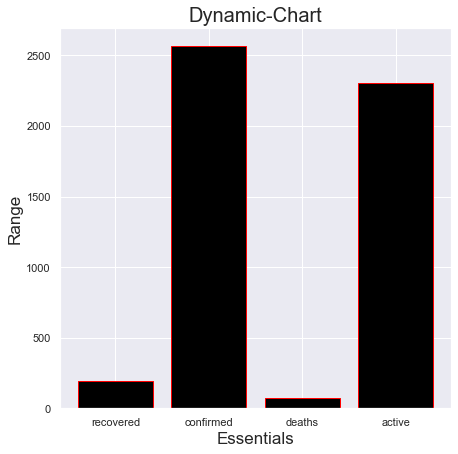

In [193]:
covid = Covid()

countries = list(covid.list_countries())
countries_list = list()

countries_list = [list(dict(countries[x]).values())[1] for x in range(len(countries))]
print(countries_list)
while True:
    try:
         country = input('Enter the country of desire : ')
         data = covid.get_status_by_country_name(country)

    except ValueError:
         print('Entered country name was invalid, \nRe-Enter : ')
         continue
    else:
         data = covid.get_status_by_country_name(country)

    break

dictionary = {
     key : data[key]


     for key in data.keys() & ("confirmed","active","deaths","recovered")
}


key = list(dictionary.keys())
values = list(map(int,dictionary.values()))

print(dictionary)

active_tot = int(covid.get_total_active_cases())
recovered_tot = int(covid.get_total_recovered())
confirmed_tot = int(covid.get_total_confirmed_cases())

total_numericals = dict({'Total Recovered' : recovered_tot, 'Total Active' : active_tot, 'Total Confirmmed': confirmed_tot,})

print("Total Cases around the world : {} ".format(total_numericals))

plt.figure(figsize=(7,7))
plt.title("Dynamic-Chart",size=20)
plt.xlabel("Essentials",size=17)
plt.ylabel("Range",size=17)
plt.bar(key,values,color='black',edgecolor = 'red')
plt.show()


### __Getting to know the Dataset__ 

In [194]:
data = pd.read_csv('covid_19_data.csv')
data.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [195]:
print("Number of Datapoints : {}".format(data.size))
print("Shape of the DataSet : {}".format(data.shape))

Number of Datapoints : 75392
Shape of the DataSet : (9424, 8)


In [196]:
dates = np.unique(data.ObservationDate) #dates 
print("These are the Recored Dates Starting from 01/22/2020 \n\n {}".format(dates))
print("\nLast Dates recorded : {}".format(data.iat[(data.shape[0]-1),1]))

These are the Recored Dates Starting from 01/22/2020 

 ['01/22/2020' '01/23/2020' '01/24/2020' '01/25/2020' '01/26/2020'
 '01/27/2020' '01/28/2020' '01/29/2020' '01/30/2020' '01/31/2020'
 '02/01/2020' '02/02/2020' '02/03/2020' '02/04/2020' '02/05/2020'
 '02/06/2020' '02/07/2020' '02/08/2020' '02/09/2020' '02/10/2020'
 '02/11/2020' '02/12/2020' '02/13/2020' '02/14/2020' '02/15/2020'
 '02/16/2020' '02/17/2020' '02/18/2020' '02/19/2020' '02/20/2020'
 '02/21/2020' '02/22/2020' '02/23/2020' '02/24/2020' '02/25/2020'
 '02/26/2020' '02/27/2020' '02/28/2020' '02/29/2020' '03/01/2020'
 '03/02/2020' '03/03/2020' '03/04/2020' '03/05/2020' '03/06/2020'
 '03/07/2020' '03/08/2020' '03/09/2020' '03/10/2020' '03/11/2020'
 '03/12/2020' '03/13/2020' '03/14/2020' '03/15/2020' '03/16/2020'
 '03/17/2020' '03/18/2020' '03/19/2020' '03/20/2020' '03/21/2020'
 '03/22/2020' '03/23/2020' '03/24/2020' '03/25/2020' '03/26/2020'
 '03/27/2020']

Last Dates recorded : 03/27/2020


#### Knowing the Datatypes of the Datapoints involved in the Dataset

In [197]:
# knowing the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              9424 non-null   int64  
 1   ObservationDate  9424 non-null   object 
 2   Province/State   5164 non-null   object 
 3   Country/Region   9424 non-null   object 
 4   Last Update      9424 non-null   object 
 5   Confirmed        9424 non-null   float64
 6   Deaths           9424 non-null   float64
 7   Recovered        9424 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 589.1+ KB


####  Converting the 'float64' type data to 'int64' 

In [198]:
# Conversion 
data[["Confirmed","Deaths","Recovered"]] =data[["Confirmed","Deaths","Recovered"]].astype(int)

#### Verifying the Conversion 

In [199]:
#verifying 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SNo              9424 non-null   int64 
 1   ObservationDate  9424 non-null   object
 2   Province/State   5164 non-null   object
 3   Country/Region   9424 non-null   object
 4   Last Update      9424 non-null   object
 5   Confirmed        9424 non-null   int64 
 6   Deaths           9424 non-null   int64 
 7   Recovered        9424 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 589.1+ KB


### describe() is a Pandas Library function used to calculate the basic Statistical results such as __Mean, Standard Deviation, and the 3 Quantiles__ 


### __Explanation for the Result__
#### The following output of the __dataDescription_ returns a DataFrame object which is basically the Statistic details of the Numericals i.e the 'int64' type Data Points only 
#### In this DataFrame object output,  the __Essentials are ['Mean', 'Three Quantiles' , 'Max' ] Values__  

In [200]:
dataDescription = data.describe()
dataDescription.drop('count',inplace =True)
print("Total Number of Data Points : {}".format(7313))
dataDescription

Total Number of Data Points : 7313


,SNo,Confirmed,Deaths,Recovered
mean,4712.500000,804.795840,30.740025,260.849745
std,2720.618802,5467.174746,302.358757,2870.788709
min,1.000000,0.000000,0.000000,0.000000
25%,2356.750000,3.000000,0.000000,0.000000
50%,4712.500000,23.000000,0.000000,0.000000
75%,7068.250000,169.000000,1.000000,11.000000
max,9424.000000,86498.000000,9134.000000,61732.000000


### __Data Preprocessing__

#### Calculating the percentage of the __Missing Values__

In [268]:
#Percentage of NAN Values 
missingvalues = [(iterator, data[iterator].isna().mean()*100) for iterator in data]
missingvalues = pd.DataFrame(missingvalues, columns=["column_name", "Mean"])
missingvalues

,column_name,Mean
0,SNo,0.0
1,ObservationDate,0.0
2,Province/State,0.0
3,Country/Region,0.0
4,Last Update,0.0
5,Confirmed,0.0
6,Deaths,0.0
7,Recovered,0.0
8,ActiveCases,0.0


#### From the above result we can comprehend that about __45.2%__ of the Datapoints are __Not-Registered__

#### Filling the NaN Values with __Not-Registered__ making it an Object-Type Datapoint

In [202]:
# inserting 
data["Province/State"]= data["Province/State"].fillna('Not-Registered')

### __Relational Analysis and Basic Visualisation__

In [203]:
# knowing the currently Active_cases 
data['ActiveCases'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head(20)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,ActiveCases
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0,1
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0,14
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,6
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0,1
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0,0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0,26
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0,2
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0,1
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0,4
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0,1


In [204]:
#coverting the Object-type date&time to date&time object 
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              9424 non-null   int64         
 1   ObservationDate  9424 non-null   datetime64[ns]
 2   Province/State   9424 non-null   object        
 3   Country/Region   9424 non-null   object        
 4   Last Update      9424 non-null   object        
 5   Confirmed        9424 non-null   int64         
 6   Deaths           9424 non-null   int64         
 7   Recovered        9424 non-null   int64         
 8   ActiveCases      9424 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 662.8+ KB


### __Correlation__ 

In [205]:
numerical_data = data.select_dtypes(exclude=['object'])
numerical_data=numerical_data.drop('SNo',axis=1)
numerical_data.corr(method='spearman')

,Confirmed,Deaths,Recovered,ActiveCases
Confirmed,1.000000,0.717369,0.665774,0.861102
Deaths,0.717369,1.000000,0.532884,0.561755
Recovered,0.665774,0.532884,1.000000,0.384268
ActiveCases,0.861102,0.561755,0.384268,1.000000


### __Frequency Tables__

In [206]:
pd.crosstab(index=data['Country/Region'],columns ='count' ,dropna=True)
# number of times these Countries are registered in the Dataset 

col_0,count
Country/Region,
Azerbaijan,1
"('St. Martin',)",1
Afghanistan,33
Albania,19
Algeria,32
...,...
Vietnam,65
West Bank and Gaza,2
Zambia,10


#### The Above result is a  Cross-Tabulation  of the Features __"Country/Region"__ and its __count__.
#### This result gives the Numerical idea  of the Number of Cases registered in the country named across the value, Multiple value means the cases can be from one or different __States__ or __Provinces__

In [207]:
pd.crosstab(index=data['Country/Region'],columns =data['Province/State'] ,dropna=True)

Province/State,"Montreal, QC","Norfolk County, MA",Alabama,"Alameda County, CA",Alaska,Alberta,American Samoa,Anhui,Arizona,Arkansas,...,Western Australia,"Williamson County, TN",Wisconsin,Wuhan Evacuee,Wyoming,Xinjiang,"Yolo County, CA",Yukon,Yunnan,Zhejiang
Country/Region,,,,,,,,,,,,,,,,,,,,,
Azerbaijan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"('St. Martin',)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albania,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zambia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### The above result is a Cross-Tabulation of  __'Country/Region'__ and __'Province/State'__ 

#### The Following output of __byCountryDat__ is the __Summary__ of the Above Cross-Tabulation

In [208]:
byCountryDat = data.groupby(['Country/Region'])[['Confirmed','Recovered','Deaths','ActiveCases']].sum()
byCountryDat

,Confirmed,Recovered,Deaths,ActiveCases
Country/Region,,,,
Azerbaijan,1,0,0,1
"('St. Martin',)",2,0,0,2
Afghanistan,651,15,13,623
Albania,1357,81,45,1231
Algeria,2563,449,185,1929
...,...,...,...,...
Vietnam,2153,659,0,1494
West Bank and Gaza,175,34,2,139
Zambia,67,0,0,67


#### Essenstial Numericals i.e __['Confirmed' , 'ActiveCases' , 'Recovered', 'Deaths']__  Across the Reported Dates

In [209]:
byObservedDate = data.groupby(["ObservationDate"])["Confirmed","ActiveCases","Recovered","Deaths"].sum().reset_index()
byObservedDate

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,ObservationDate,Confirmed,ActiveCases,Recovered,Deaths
0,2020-01-22,555,510,28,17
1,2020-01-23,653,605,30,18
2,2020-01-24,941,879,36,26
3,2020-01-25,1438,1357,39,42
4,2020-01-26,2118,2010,52,56
...,...,...,...,...,...
61,2020-03-23,378287,260832,100958,16497
62,2020-03-24,417966,291646,107705,18615
63,2020-03-25,467594,332643,113770,21181
64,2020-03-26,529591,383471,122150,23970


### __Visualization__

According to the Last Reporting date : 2020-03-27 00:00:00


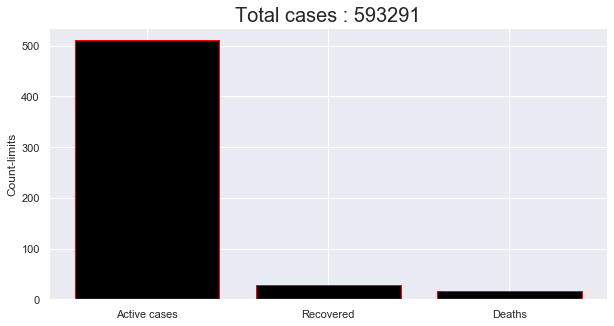

In [210]:
labels = ["Active cases","Recovered","Deaths"]
values = byObservedDate.loc[0, ["ActiveCases","Recovered","Deaths"]]
plt.figure(figsize=(10, 5))
plt.title('Total cases : '+str(byObservedDate.Confirmed[byObservedDate.Confirmed.size-1]),size=20)
plt.ylabel('Count-limits')
plt.bar(labels,values,color='black',edgecolor='red')
print('According to the Last Reporting date : {}'.format(data.iat[(data.shape[0]-1),1]))

### __Mortality Rate__

#### Mortality Rate Determine how __Lethal__ a Virus can be.
#### For Context the Mortality rate for __Ebola__: 50%
#### Mortality rate is the Ratio of  __Total Number of Deaths__ to __Total Confirmed Cases__ at that __Period of time__ 
##### Note- _Mortality Rate Varies with Time Period and the Exponential Growth of the Numericals_

In [211]:
tot_deaths = data.Deaths.sum()
tot_confirmed = data.Confirmed.sum()
Mortality_rate = tot_deaths/tot_confirmed
Mortality_rate = Mortality_rate*100
print("Estimated Mortaltity Rate {:.2f}%".format(Mortality_rate))

Estimated Mortaltity Rate 3.82%


### Covid19's spread in India in contrast to Italy 

In [212]:
data.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered', 'ActiveCases'],
      dtype='object')

In [213]:
confirmed_df = pd.read_csv('time_series_covid_19_confirmed.csv')
recovered_df = pd.read_csv('time_series_covid_19_recovered.csv')
deaths_df = pd.read_csv('time_series_covid_19_deaths.csv')

In [214]:
indian_confirmed_df = confirmed_df[confirmed_df['Country/Region'] == 'India']
indian_recovered_df = recovered_df[recovered_df['Country/Region'] == 'India']
indian_deaths_df = deaths_df[deaths_df['Country/Region'] == 'India'] 

In [215]:
confirmed = indian_confirmed_df.iloc[:, 4:].T
deaths = indian_deaths_df.iloc[:, 4:].T
recovered = indian_recovered_df.iloc[:, 4:].T


In [216]:
italy_confirmed_df = confirmed_df[confirmed_df['Country/Region'] == 'Italy']
italy_recovered_df = recovered_df[recovered_df['Country/Region'] == 'Italy']
italy_deaths_df = deaths_df[deaths_df['Country/Region'] == 'Italy']
italy_deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
137,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,2978,3405,4032,4825,5476,6077,6820,7503,8215,9134


In [217]:
itconfirmed = italy_confirmed_df.iloc[:, 4:].T
itdeaths = italy_deaths_df.iloc[:, 4:].T
itrecovered = italy_recovered_df.iloc[:, 4:].T

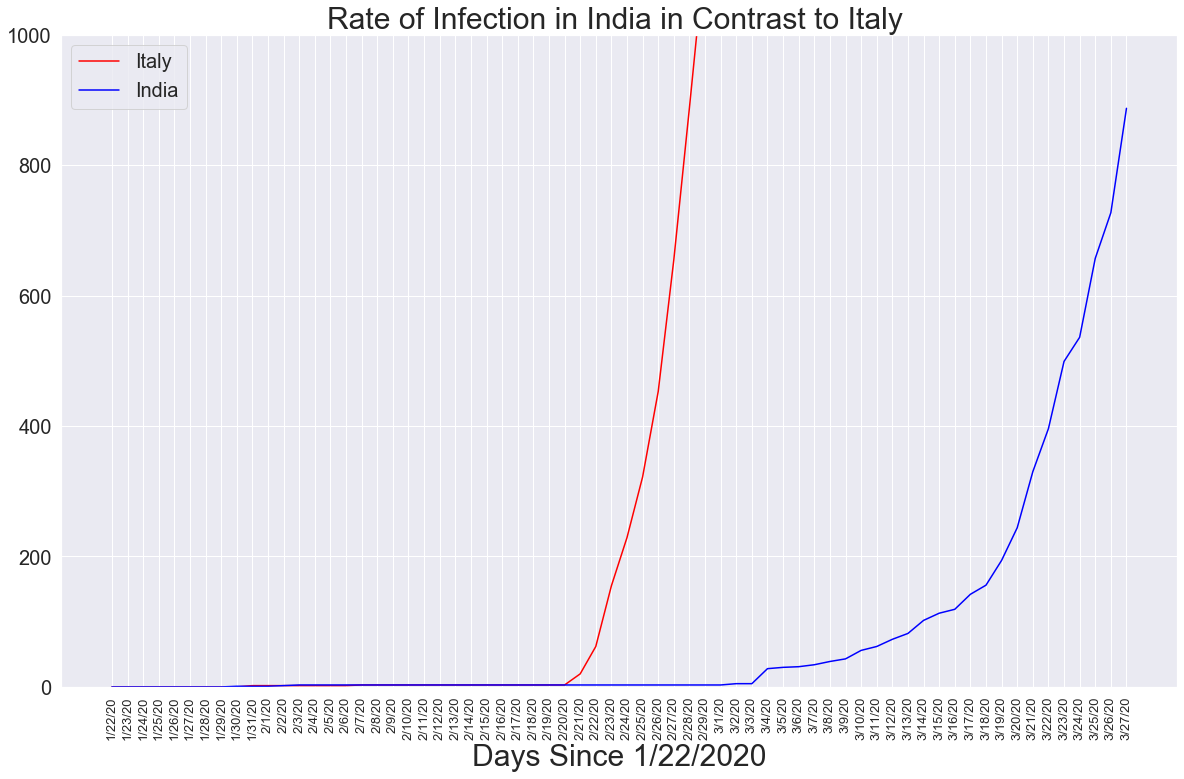

In [218]:
plt.figure(figsize=(20, 12))
plt.xlabel('Days Since 1/22/2020', size=30)
plt.plot(confirmed.index,itconfirmed,color='red')
plt.plot(confirmed.index,confirmed,color='blue')
plt.ylim(0,1000)
plt.xticks(size = 13,rotation=90)
plt.yticks(size=20)
plt.legend(['Italy', 'India'], prop={'size': 20})
plt.title("Rate of Infection in India in Contrast to Italy ",size =30)
plt.show()

## __Building a Model__

In [219]:
confirmed = confirmed.rename(columns={list(confirmed.columns)[0]: "ConfirmedCases"})
deaths = deaths.rename(columns={list(deaths.columns)[0]: "Deaths"})
recovered = recovered.rename(columns={list(recovered)[0]: "Recovered"})
confirmed.index = pd.to_datetime(confirmed.index)
deaths.index = pd.to_datetime(deaths.index)
recovered.index = pd.to_datetime(recovered.index)
print('The Dates Registered in the DataSet are\n :- {}'.format(confirmed.index))

The Dates Registered in the DataSet are
 :- DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '202

#### Predicting the spread of Covid19 in India 

In [220]:
print("-- Cases According to this Dataset -- ")
print('Indian Confirmed Cases ' + str(confirmed['ConfirmedCases'][-1]))
print('Indian Death Cases ' + str(deaths['Deaths'][-1]))
print('Indian Recovery Cases ' + str(recovered['Recovered'][-1]))
indian_active_cases = (confirmed['ConfirmedCases'] - deaths['Deaths'] - recovered['Recovered'])
print('Active cases in India ' + str(indian_active_cases[-1]))

-- Cases According to this Dataset -- 
Indian Confirmed Cases 887
Indian Death Cases 20
Indian Recovery Cases 73
Active cases in India 794


In [221]:
dates = confirmed.index
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
indian_cases = confirmed['ConfirmedCases'].T
indian_total_deaths = deaths['Deaths'].T
indian_total_recovered = recovered['Recovered'].T

In [222]:
# calculate rates
summation_deaths = deaths['Deaths'][-1]
summation_Confirmed = confirmed['ConfirmedCases'][-1]
summation_recovered = recovered['Recovered'][-1]
mortality_rate = summation_deaths/summation_Confirmed
recovery_rate = summation_recovered/summation_Confirmed
print('Indian Mortality Rate as per date(mention) : {:.2f}%'.format(mortality_rate*100))
print('Indian Recovery Rate as per date(mention) : {:.2f}%'.format(recovery_rate*100))

Indian Mortality Rate as per date(mention) : 2.25%
Indian Recovery Rate as per date(mention) : 8.23%


In [223]:
Future_dates_limit = 30
forcast = np.array([i for i in range(len(dates)+Future_dates_limit)]).reshape(-1, 1)
adj_dates = forcast[:-30]
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
len(forcast)

96

In [224]:
confirmed_cases = np.array(confirmed['ConfirmedCases']).reshape(-1, 1)

### __Polynomial Linear Regression__ 
##### Polynomial Regression is a form of linear regression in which the relationship between the independent variable __x__ and  the dependent vairiable __y__  is modeled as the __nth__ degree polynomial. Polynmial Regression fits a non-linear relationship between the values of x and the corresponding conditional mean y.
 

In [231]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(days_since_1_22) 
poly_future_forcast = poly.fit_transform(forcast)

In [232]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, confirmed_cases)
linear_pred = linear_model.predict(poly_future_forcast)

In [267]:
# Future predictions using Polynomial Regression 
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions in INDIA : "Confirmed_Cases"')
finalresult = set(zip(future_forcast_dates[-30:], np.round(linear_pred[-30:])))
finalresult

Polynomial regression future predictions in INDIA : "Confirmed_Cases"


{('03/28/2020', 999.0),
 ('03/29/2020', 1147.0),
 ('03/30/2020', 1313.0),
 ('03/31/2020', 1497.0),
 ('04/01/2020', 1701.0),
 ('04/02/2020', 1926.0),
 ('04/03/2020', 2174.0),
 ('04/04/2020', 2447.0),
 ('04/05/2020', 2746.0),
 ('04/06/2020', 3073.0),
 ('04/07/2020', 3430.0),
 ('04/08/2020', 3818.0),
 ('04/09/2020', 4241.0),
 ('04/10/2020', 4700.0),
 ('04/11/2020', 5197.0),
 ('04/12/2020', 5734.0),
 ('04/13/2020', 6314.0),
 ('04/14/2020', 6940.0),
 ('04/15/2020', 7614.0),
 ('04/16/2020', 8338.0),
 ('04/17/2020', 9116.0),
 ('04/18/2020', 9950.0),
 ('04/19/2020', 10844.0),
 ('04/20/2020', 11799.0),
 ('04/21/2020', 12820.0),
 ('04/22/2020', 13909.0),
 ('04/23/2020', 15071.0),
 ('04/24/2020', 16307.0),
 ('04/25/2020', 17623.0),
 ('04/26/2020', 19022.0)}

##                                  __Ending Notes__ 
###  Virus is a Non-living Entity, It requires a Host for its living and Duplicating, Before we self proclaim ourselves as an Intellectually sophesticated living beings just use common sense stay home and stay safe

### Analysis by - __N. Rohan Sai__ 